In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os 
import glob
import time
from copy import deepcopy
import numpy as np
import pandas as pd 

from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

from brainiak import image, io
from brainiak.isc import isc, isfc, permutation_isc
import matplotlib.pyplot as plt
import seaborn as sns 

%autosave 5
%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

ModuleNotFoundError: No module named 'brainiak'

Text(0.5, 1.0, 'ISC map for subject sid000020, task = run_05')

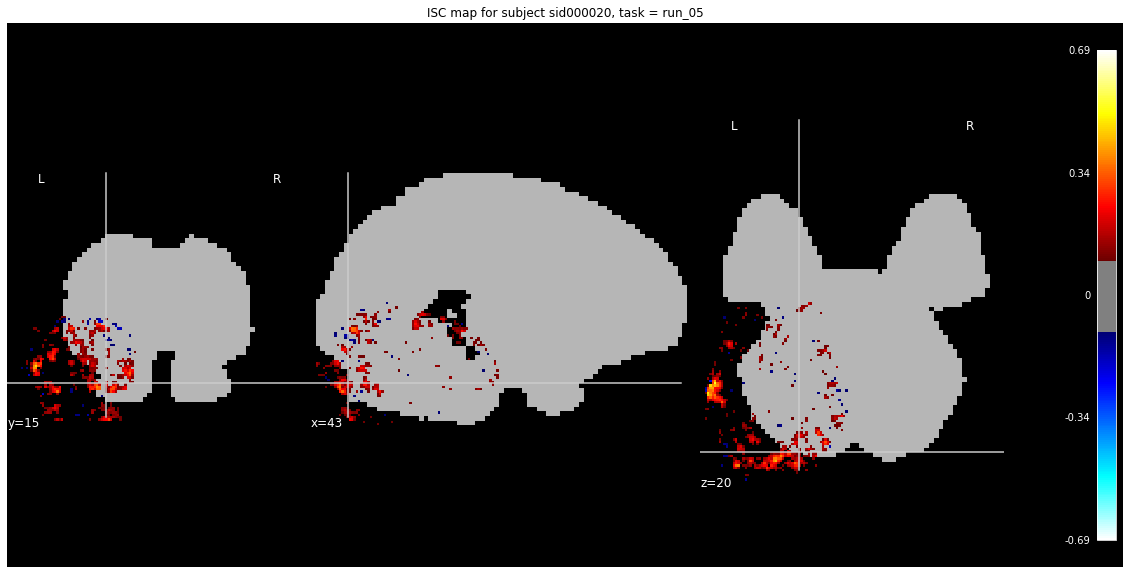

In [9]:
import matplotlib.pyplot as plt
subj_id = 'sid000020'
task_name= 'run_05'
threshold = 0.1

isc_nifti = '/Users/gangxinli/Desktop/Internship/Neuro/Neuro_ISC/Data/11Sep/vtc_tal/ISCresult/sub-sid000009_task-movie_run-05_bold_SCCAI_3DMCTS_THPGLMF3c_256_trilin_2x1_11sep.nii.gz'
back_ground_image='/Users/gangxinli/Desktop/Internship/Neuro/Neuro_ISC/Data/30Aug/1610/VTC_TALmask_2.nii'
f, ax = plt.subplots(1,1, figsize = (20, 10))
plotting.plot_stat_map(
    isc_nifti,
    bg_img=back_ground_image,
    black_bg=True,
    #cut_coords=(50,22,22),
    #cut_coords=[80,96,71],
    threshold=threshold,
    axes=ax
)
ax.set_title('ISC map for subject {}, task = {}' .format(subj_id,task_name)) 

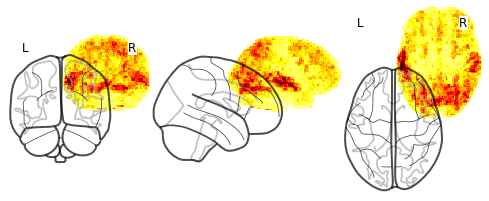

In [131]:

#only used within MNI
plotting.plot_glass_brain('/Users/gangxinli/Desktop/Internship/Neuro/Neuro_ISC/Data/30Aug/1610/0100.nii')





In [117]:
%matplotlib inline

import os
import glob
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, isfc, isps, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state
from scipy.stats import ttest_1samp
from scipy.signal import hilbert
import networkx as nx
from IPython.display import HTML

# import nest_asyncio
# nest_asyncio.apply()
import datalad.api as dl

In [119]:
def get_subject_roi(data, roi):
    sub_rois = {}
    for sub in data:
        sub_rois[sub] = data[sub].iloc[:, roi]
    return pd.DataFrame(sub_rois)

sub_rois = get_subject_roi(sub_timeseries, roi)
isc_r, isc_p = {}, {}
for roi in range(50):
    stats = isc(get_subject_roi(sub_timeseries, roi), n_bootstraps=5000, metric='median', method='bootstrap')
    isc_r[roi], isc_p[roi] = stats['isc'], stats['p']
isc_r_brain, isc_p_brain = roi_to_brain(pd.Series(isc_r), mask_x), roi_to_brain(pd.Series(isc_p), mask_x)
view_img(isc_r_brain.to_nifti())

NameError: name 'sub_timeseries' is not defined

ValueError: File not found: 'sub-sid000278_task-movie_run-05_bold_SCCAI_3DMCTS_THPGLMF3c_256_trilin_2x1_0004.nii.gz'

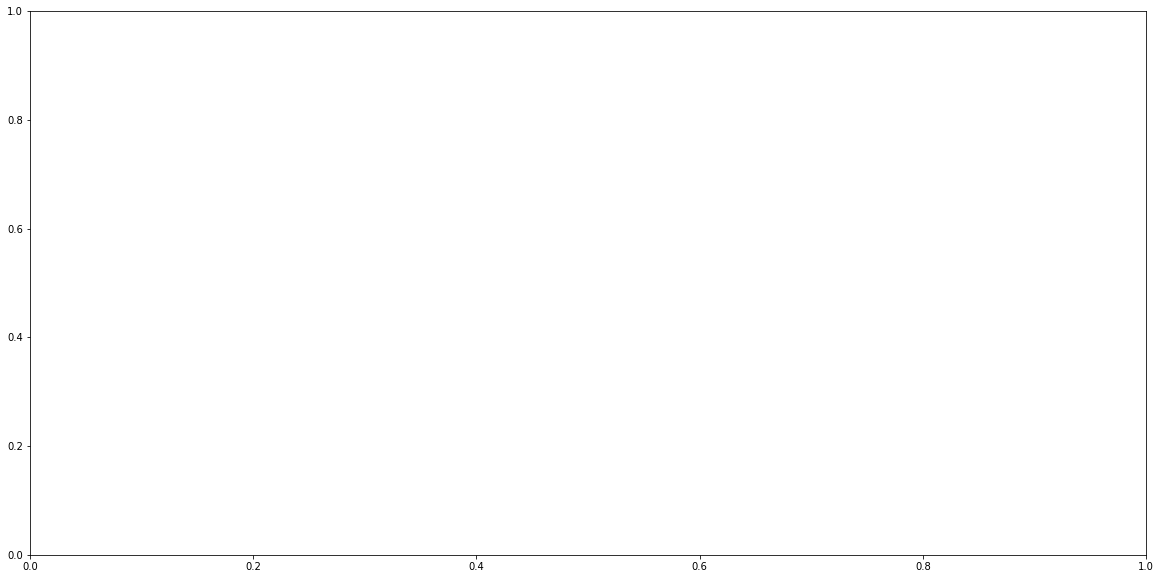

In [43]:
for root,dirs,files in os.walk('/Users/gangxinli/Desktop/Internship/Neuro/Neuro_ISC/ISCanalysis/result'):
    #print("11111root:"+root) 
    #print(dirs)
    for file in files:
        if file.split(".")[-1] == 'gz':
            isc_nifti = file
            f, ax = plt.subplots(1,1, figsize = (20, 10))
            plotting.plot_stat_map(
                isc_nifti,
                threshold=threshold,
                axes=ax
            )

In [7]:
# set some plotting params 
subj_id = 0 
task_name = 'intact1'
threshold = .2 
view = 'medial'

# get a surface
fsaverage = datasets.fetch_surf_fsaverage5()

# Make the ISC output a volume
isc_vol = np.zeros(brain_nii.shape)
# Map the ISC data for the first participant into brain space
isc_vol[coords] = isc_maps[task_name][subj_id, :]
# make a nii image of the isc map 
isc_intact_1subj = nib.Nifti1Image(isc_vol, brain_nii.affine, brain_nii.header)

# make "texture" 
texture = surface.vol_to_surf(isc_intact_1subj, fsaverage.pial_left) 

# plot 
title_text = ('Avg ISC map, {} for one participant'.format(task_name))
surf_map = plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture, 
    hemi='left', view=view, 
    title= title_text, 
    threshold=threshold, cmap='RdYlBu_r', 
    colorbar=True,
    bg_map=fsaverage.sulc_left)

AttributeError: module 'nilearn.datasets' has no attribute 'fetch_surf_fsaverage5'